In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL',api_key ='31f96dd289358f31cd7cc1c973e90bd375e9ae3e' )

<ipython-input-2-326d022fd4f5>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key ='31f96dd289358f31cd7cc1c973e90bd375e9ae3e' )


In [3]:
df.to_csv('/content/AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/AAPL.csv')

In [6]:
df2 = df.reset_index()['close']

In [7]:
df2[1228:]

1228    191.73
1229    188.04
1230    184.40
1231    186.86
1232    185.85
1233    187.68
1234    189.30
1235    189.41
1236    188.32
1237    188.85
1238    187.15
1239    185.04
1240    184.15
1241    183.86
1242    182.31
1243    181.56
1244    182.32
1245    184.37
1246    182.52
1247    181.16
1248    182.63
1249    181.42
1250    180.75
1251    179.66
1252    175.10
1253    170.12
1254    169.12
1255    169.00
1256    170.73
Name: close, dtype: float64

In [8]:
df1 = df.reset_index()['close']

In [9]:
df1.shape

(1257,)

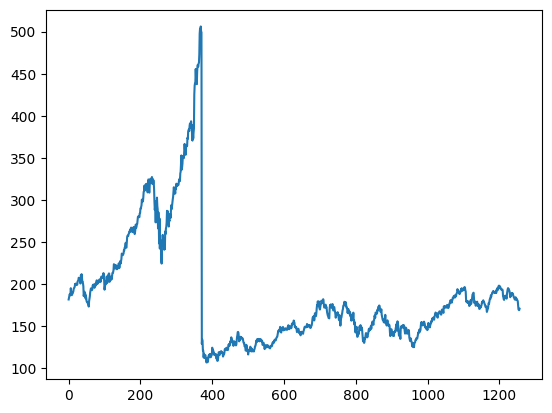

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(1257, 1)

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
import numpy
def create_dataset(dataset,time_step=1) :
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [17]:
print(X_train)

[[0.18752661 0.1925861  0.19857232 ... 0.26599875 0.2544521  0.24340639]
 [0.1925861  0.19857232 0.20333125 ... 0.2544521  0.24340639 0.21665623]
 [0.19857232 0.20333125 0.19959925 ... 0.24340639 0.21665623 0.22582342]
 ...
 [0.16363181 0.1636819  0.17092048 ... 0.107201   0.10519724 0.10487163]
 [0.1636819  0.17092048 0.17204759 ... 0.10519724 0.10487163 0.11113338]
 [0.17092048 0.17204759 0.1636819  ... 0.10487163 0.11113338 0.096531  ]]


In [18]:
print(X_test.shape), print(y_test.shape)
print(X_train.shape), print(y_train.shape)

(339, 100)
(339,)
(716, 100)
(716,)


(None, None)

In [19]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(716, 100, 1)
(716,)
(339, 100, 1)
(339,)


(None, None)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [22]:
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 347ms/step - loss: 0.0370 - val_loss: 6.6028e-04
Epoch 2/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0146 - val_loss: 5.8025e-04
Epoch 3/100
12/12 [==============================] - 3s 261ms/step - loss: 0.0096 - val_loss: 3.3408e-04
Epoch 4/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0085 - val_loss: 6.0307e-04
Epoch 5/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0076 - val_loss: 2.3284e-04
Epoch 6/100
12/12 [==============================] - 2s 171ms/step - loss: 0.0084 - val_loss: 2.0895e-04
Epoch 7/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0079 - val_loss: 8.8191e-04
Epoch 8/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0078 - val_loss: 5.8809e-04
Epoch 9/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0065 - val_loss: 9.3556e-04
Epoch 10/100
12/12 [==============================] - 

In [26]:
import tensorflow as tf

In [27]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


11/11 [==============================] - 0s 32ms/step


In [28]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error


In [30]:
math.sqrt(mean_squared_error(y_train,train_predict))

219.68243385146542

In [31]:
math.sqrt(mean_squared_error(y_test,test_predict))

168.2720361932145

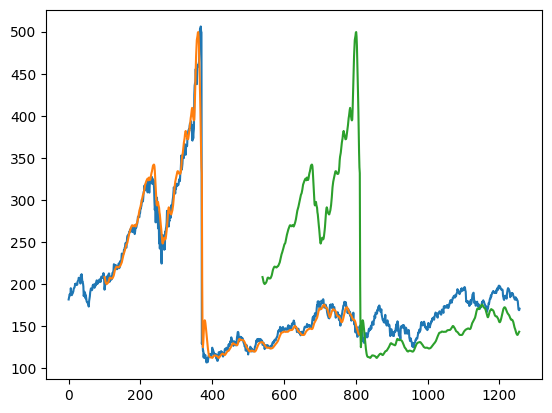

In [32]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(test_predict)+(look_back*2)+1:len(df1)-1, :] = train_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

440

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [35]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()


In [36]:
temp_input

[0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,
 0.16095178459611764,
 0.15040701314965554,
 0.1537382592360676,
 0.15892298058860355,
 0.16012523481527863,
 0.16814026299311202,
 0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257,
 0.18780212899185966,
 0.19048215403882274,
 0.1892798998121477,
 0.19927363807138382,
 0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.21410144020037564,
 0.21898559799624295,
 0.22259236067626798,
 0.21625547902316838,
 0.22008766437069505,
 0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.2

In [41]:
from numpy import array

lst_output = []
n_steps = 100
n_steps2 = 100
i = 0
print("hello world")
while i < 30:  # increase days to increase time stamp

    if len(temp_input) > 100:  # increase to increase data that reflects to the model
        print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, len(temp_input) - 1, 1))  # Reduce the steps by 1
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i += 1

    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))  # Use the length of temp_input
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


hello world
[0.17610519724483403, 0.17282404508453347, 0.17187226048841575, 0.1654101440200375, 0.1657107075767063, 0.1668127739511584, 0.16095178459611764, 0.15040701314965554, 0.1537382592360676, 0.15892298058860355, 0.16012523481527863, 0.16814026299311202, 0.17715716969317463, 0.17485284909204757, 0.1813149655604257, 0.18780212899185966, 0.19048215403882274, 0.1892798998121477, 0.19927363807138382, 0.19526612398246712, 0.20187852222917968, 0.20330619912335623, 0.2075641828428303, 0.2075140889167188, 0.21192235441452717, 0.20989355040701307, 0.211571696931747, 0.20821540388227922, 0.2077645585472761, 0.2092924232936756, 0.20671258609893545, 0.20816530995616772, 0.2113963681903569, 0.20686286787726987, 0.21685660613650587, 0.21410144020037564, 0.21898559799624295, 0.22259236067626798, 0.21625547902316838, 0.22008766437069505, 0.2282279273638071, 0.22860363180964305, 0.2272510958046336, 0.22304320601127103, 0.22567313713212267, 0.2203882279273638, 0.22001252348152783, 0.21730745147150

In [42]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1257

In [45]:
df3 = df1.tolist()
df3.extend(lst_output)

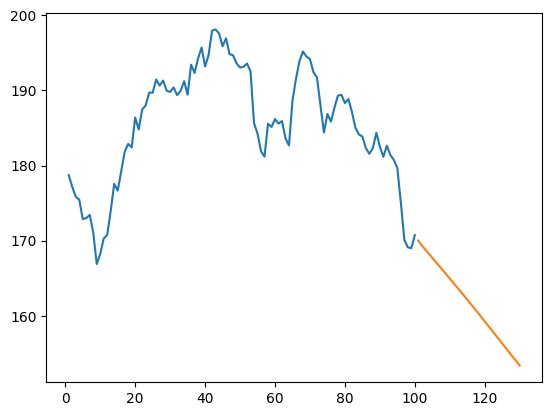

In [49]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

#final prediction

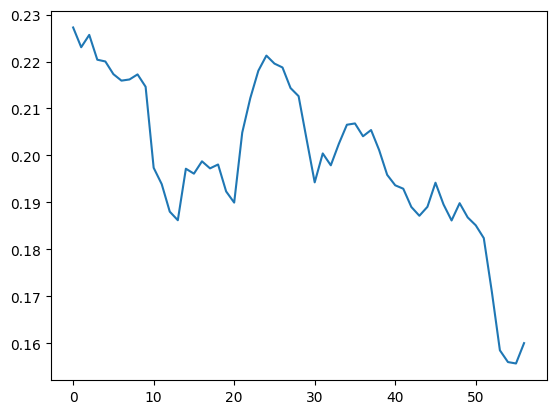

In [47]:
df4 = df1.tolist()
df3.extend(lst_output)
plt.plot(df4[1200:])

#data check